In [21]:
# Step 1: Dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Train shape:", x_train.shape, y_train.shape)
print("Test shape:", x_test.shape, y_test.shape)

# Normalize (0-255 → 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0
# Why normalize? → To make training faster & stable by keeping values small.

Train shape: (60000, 28, 28) (60000,)
Test shape: (10000, 28, 28) (10000,)


In [22]:
# Step 2: Model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # 784 → input layer
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()   # Prints architecture

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Step 3: Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Why sparse_categorical_crossentropy? → Labels are integers, not one-hot encoded.

In [24]:
#Train the model with only 1 epoch — what happens to accuracy?
print("\nTraining for 1 epochs:")
history_1 = model.fit(x_train, y_train, epochs=1, validation_split=0.1)


Training for 1 epochs:
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9245 - loss: 0.2585 - val_accuracy: 0.9693 - val_loss: 0.1095


In [25]:
# Step 4: Train
print("\nTraining for 4 epochs:")
history_4 = model.fit(x_train, y_train, epochs=4, validation_split=0.1)

print("\nTraining for 10 epochs:")
history_10 = model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# Accuracy may not always improve → model can overfit.


Training for 4 epochs:
Epoch 1/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9672 - loss: 0.1092 - val_accuracy: 0.9727 - val_loss: 0.0919
Epoch 2/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9764 - loss: 0.0769 - val_accuracy: 0.9735 - val_loss: 0.0885
Epoch 3/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9816 - loss: 0.0571 - val_accuracy: 0.9795 - val_loss: 0.0713
Epoch 4/4
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9859 - loss: 0.0431 - val_accuracy: 0.9777 - val_loss: 0.0851

Training for 10 epochs:
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9877 - loss: 0.0365 - val_accuracy: 0.9795 - val_loss: 0.0851
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9909 - loss: 0.0296 - val_accuracy: 0.9803 - val_loss: 0.0821
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9913 - loss: 0.0252 - val_accuracy: 0.9798 - val_loss: 0.0785
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━

In [26]:
# Step 5: Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTest accuracy:", test_acc)
# Compare train vs test accuracy → gap means overfitting.


Test accuracy: 0.9763000011444092


In [27]:
# Step 6: Predict
pred_1 = model.predict(x_test[:1])
print("\nPredicted label (1st image):", pred_1.argmax())
print("Actual label:", y_test[0])

pred_5 = model.predict(x_test[4:5])
print("\nPredicted label (5th image):", pred_5.argmax())
print("Actual label:", y_test[4])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

Predicted label (1st image): 7
Actual label: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step

Predicted label (5th image): 4
Actual label: 4


In [28]:
# Step 7: Experiments
# (a) Add Dense(32, ReLU) (Add one more hidden layer with 32 neurons)
model2 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=5, verbose=0)
print("\nExtra Dense(32): Test acc =", model2.evaluate(x_test, y_test, verbose=0)[1])


Extra Dense(32): Test acc = 0.9789000153541565


In [29]:
# (b) Optimizer = SGD (Change optimizer to 'sgd')
model3 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=5, verbose=0)
print("SGD Optimizer: Test acc =", model3.evaluate(x_test, y_test, verbose=0)[1])

SGD Optimizer: Test acc = 0.9513000249862671


In [30]:
# (c) Replace ReLU with Tanh
model4 = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(10, activation='softmax')
])
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.fit(x_train, y_train, epochs=5, verbose=0)
print("Tanh Activation: Test acc =", model4.evaluate(x_test, y_test, verbose=0)[1])

Tanh Activation: Test acc = 0.9754999876022339


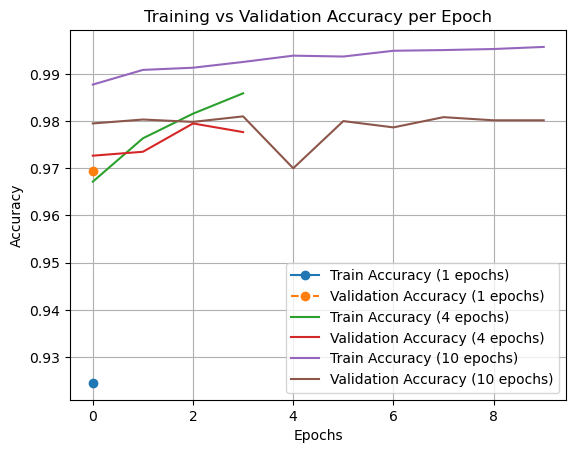

In [32]:
# Plot training accuracy vs. epoch using matplotlib.
import matplotlib.pyplot as plt

# Plot accuracy for 1-epoch training
plt.plot(history_1.history['accuracy'],'o-', label='Train Accuracy (1 epochs)')
plt.plot(history_1.history['val_accuracy'],'o--',label='Validation Accuracy (1 epochs)')

# Plot accuracy for 4-epoch training
plt.plot(history_4.history['accuracy'], label='Train Accuracy (4 epochs)')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy (4 epochs)')

# Plot accuracy for 10-epoch training
plt.plot(history_10.history['accuracy'], label='Train Accuracy (10 epochs)')
plt.plot(history_10.history['val_accuracy'], label='Validation Accuracy (10 epochs)')

plt.title("Training vs Validation Accuracy per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()